# Projeto Ciência de Dados - Previsão de Preços

- Nosso desafio é conseguir prever o preço de barcos que vamos vender baseado nas características do barco, como: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=share_link

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

In [ ]:
# Comentar todas as linhas de código: Ctrl + /

In [1]:
import pandas as pd

# Passo 3: Extração/Obtenção de Dados
tabela = pd.read_csv("Material/barcos_ref.csv")
display(tabela)

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


In [ ]:
# Passo 4: Ajuste de Dados (Tratamento/Limpeza)
print(tabela.info())

# A base já está nos conformes, então não é necessário fazer a normalização

In [6]:
# Passo 5: Análise Exploratória

# Calculo da correlação da tabela - Considerando somente a coluna preço
display(tabela.corr()[["Preco"]])


# Obs: Vai de -1 a 1. Correlação é igual a 1 quando a relação de crescimento entre duas caracteristicas é 100% equivalente
#      No caso dos barcos as caracteristicas de maior correlação é o comprimento e a largura, com correlação média
#      O Tipo de barco tem uma correlação considerável

,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


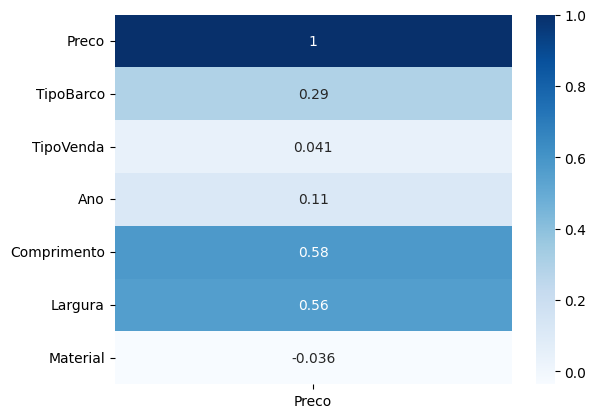

In [7]:
# Correlação com visualização gráfica - opcional
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(tabela.corr()[["Preco"]], annot=True, cmap="Blues") # cmap altera o gradiante das cores
plt.show()


# Obs: O Seaborn foi criado usando o Matplotlib por questões estéticas, por isso a visualização é com plt e a criação do gráfico é com o sns

In [15]:
# Passo 6: Modelagem

from sklearn.model_selection import train_test_split

# Separação da base em dados 
y = tabela["Preco"]
x = tabela.drop("Preco", axis=1) # axis 1 é o eixo de colunas

# Dividir a base em partes de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30, random_state=1) # random_state 1 separa sempre a base da mesmo maneira


# Obs:
#   Y é o que deve ser previsto, o preço
#   X são as demais caracteristicas, o que deve ser usado de informação para prever o preço

In [16]:
# Passo 7: Algoritmos de Inteligência Artificial

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treinamento dos modelos
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)


# Obs:
#   Regressão linear: Traça a melhor reta que descreve o modelo, para fazer a previsão
#   Arvore de decisão: Traça os caminhos possíveis fazendo perguntas de sim e não
#   Exemplo legal de arvore de decisão: https://pt.akinator.com

RandomForestRegressor()

In [17]:
# Passo 8: Interpretação de Resultados

from sklearn import metrics

# Criar as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# Comparar os resultados dos modelos - R2: Percentual de precisão de 0 a 100%
print(f'Regressão Linear: {metrics.r2_score(y_teste, previsao_regressaolinear)}')
print(f'Classificação: {metrics.r2_score(y_teste, previsao_arvoredecisao)}')

Regressão Linear: 0.4490324760735811
Classificação: 0.8655249768678642


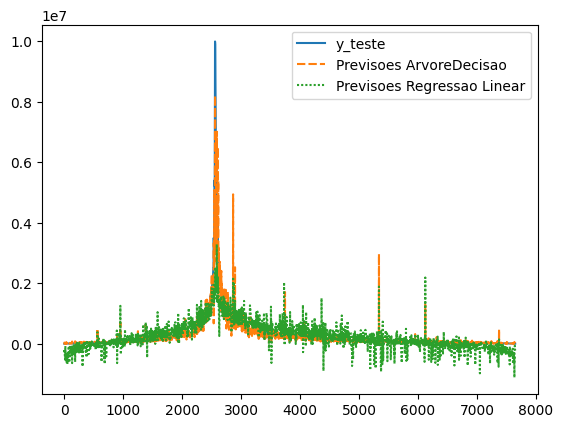

In [18]:
# Tabela e visualização em gráfico de linha
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

# plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [20]:
# Passo 7: Pegar os novos barcos para fazer as previsões
nova_tabela = pd.read_csv("Material/novos_barcos.csv")
display(nova_tabela)

# Print dos preços previstos para cada registro
previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 5831.72333333  8678.39666667 19107.15      ]
